In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [52]:
import os

# Define the path to your dataset relative to your notebook file
# Ensure the 'animal_dataset' folder is in the same directory as your .ipynb file
data_dir = os.path.join(os.getcwd(), 'animal_dataset') 

# Set image parameters
img_height = 32 # Adjust to your image size or preferred size
img_width = 32  # Adjust to your image size or preferred size
batch_size = 32

# Load the dataset
# Keras automatically infers labels from the subdirectory names ('cat', 'dog', 'panda')
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    label_mode='int',
    color_mode='grayscale',     # important
    image_size=(img_height, img_width),
    shuffle=True,
    batch_size=None,            # VERY IMPORTANT: gives single samples, not batches
)
class_names = dataset.class_names
print("Classes:", class_names)

Found 300 files belonging to 3 classes.
Classes: ['cat', 'dog', 'panda']


In [53]:
# Convert all images and labels into NumPy arrays
x_data = []
y_data = []

for img, label in dataset:
    x_data.append(img.numpy())    # shape: (32,32,1)
    y_data.append(label.numpy())  # shape: scalar

x_data = np.array(x_data)
y_data = np.array(y_data)
print(y_data)
print("Full dataset shape:", x_data.shape, y_data.shape)

[2 1 1 0 0 1 0 1 0 2 1 2 2 2 2 0 2 2 2 0 0 0 0 1 2 1 0 0 2 2 2 2 2 1 1 0 2
 2 2 0 2 0 0 0 2 0 0 2 1 0 2 1 2 0 1 0 2 1 2 1 1 1 1 2 2 1 2 1 0 2 2 1 2 2
 0 1 1 0 2 2 2 0 0 0 1 1 0 0 1 0 2 1 1 1 0 0 0 1 1 2 0 0 1 1 0 2 2 2 0 1 0
 1 2 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 2 0 1 2 2 0 2 1 2 2 0 0 0 0 2 0 1 1 0 1
 2 0 0 2 2 2 2 0 0 1 1 1 0 0 1 2 1 0 1 1 2 0 0 1 2 0 1 1 2 0 2 2 0 2 0 1 1
 1 2 2 0 0 1 2 1 2 2 1 0 0 1 1 1 1 1 2 2 0 2 0 2 1 0 2 1 1 1 1 0 1 0 2 1 2
 1 2 1 1 2 1 0 0 2 0 0 0 2 1 0 1 1 1 1 0 1 1 2 1 0 1 1 2 2 2 0 0 0 0 2 0 2
 1 1 0 0 1 0 0 1 2 2 1 2 2 2 1 2 2 2 2 1 2 2 1 0 0 2 2 2 2 2 1 1 2 0 0 2 1
 1 0 1 0]
Full dataset shape: (300, 32, 32, 1) (300,)


In [54]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, shuffle=True, random_state=42
)
print(y_train)

[0 1 0 1 0 2 0 2 2 2 0 1 2 2 0 0 0 1 2 2 2 2 0 0 2 1 0 2 0 1 2 0 0 1 2 2 2
 1 2 1 0 2 2 1 0 1 0 2 2 0 2 0 0 1 1 0 0 0 0 2 0 2 1 1 0 0 2 0 1 0 2 2 2 0
 2 2 0 2 2 1 1 0 0 1 0 1 0 0 2 0 1 2 2 1 2 0 1 1 1 1 1 1 2 0 2 2 2 0 0 1 0
 2 1 0 0 2 2 0 0 0 1 2 2 2 0 1 0 1 1 2 1 0 0 1 1 2 1 2 0 2 0 1 2 2 1 1 2 0
 1 1 2 1 0 2 0 2 2 2 0 2 0 2 0 2 1 0 0 0 0 1 0 1 2 2 1 2 2 0 1 1 1 1 0 0 1
 1 1 1 2 0 2 0 0 1 2 1 0 2 0 1 1 2 0 2 1 1 2 2 2 1 1 2 1 0 1 2 0 2 1 1 0 0
 0 2 2 0 0 1 2 2 0 1 0 0 0 0 1 2 2 1]


In [55]:
cat_indices = np.where(y_train == class_names.index("cat"))[0]
dog_indices = np.where(y_train == class_names.index("dog"))[0]
panda_indices = np.where(y_train == class_names.index("panda"))[0]

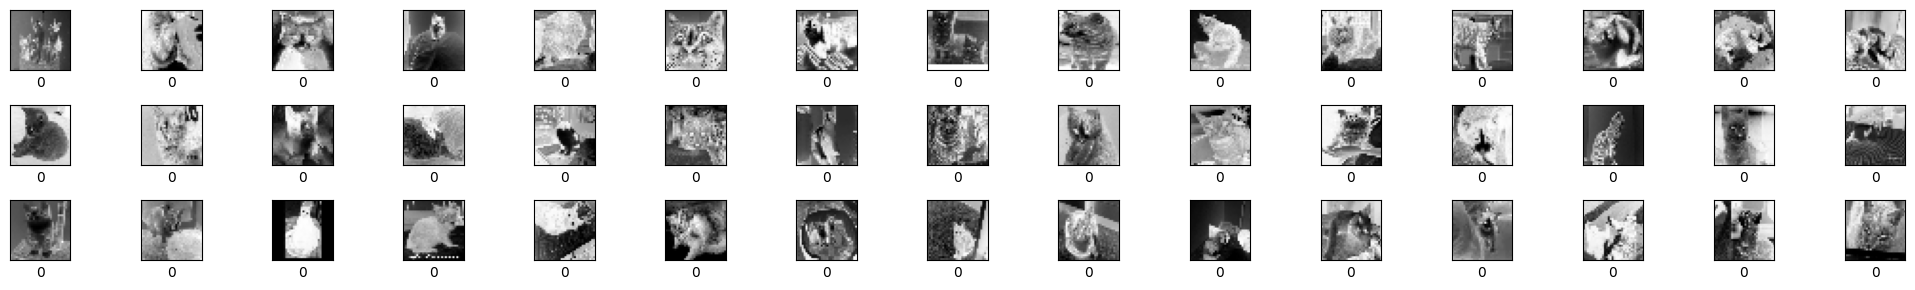

In [56]:
ROWS = 3
COLS = 15
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        inedx=cat_indices[i]
        plt.imshow(x_train[inedx], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[inedx])
        i += 1
plt.tight_layout()
plt.show() 

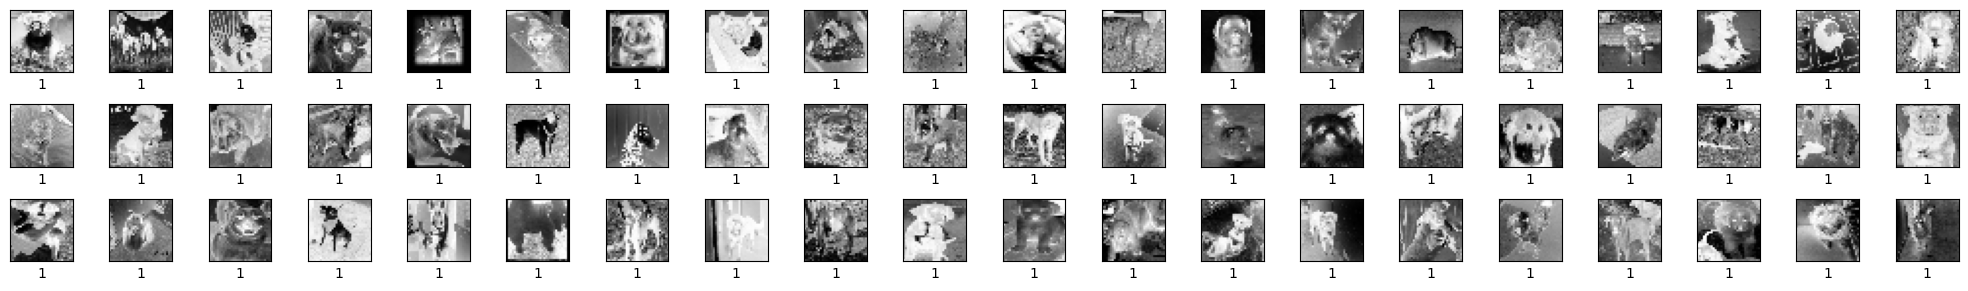

In [57]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        inedx=dog_indices[i]
        plt.imshow(x_train[inedx],cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[inedx])
        i += 1
plt.tight_layout()
plt.show() 

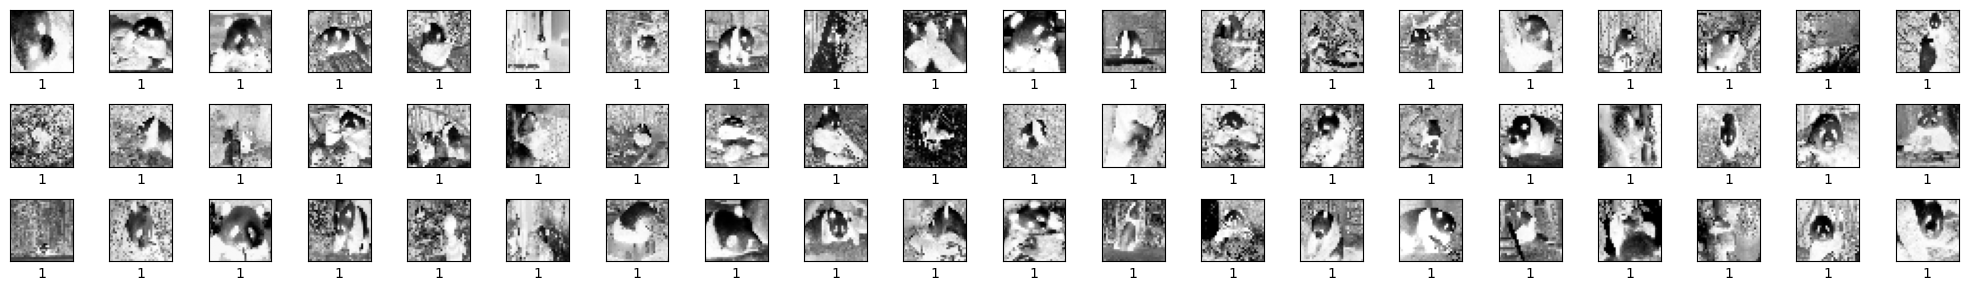

In [58]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        index=panda_indices[i]
        plt.imshow(x_train[index],cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[inedx])
        i += 1
plt.tight_layout()
plt.show() 

In [59]:

x_train = x_train.reshape(-1, 32*32).astype("float32") / 255.0
x_test = x_test.reshape(-1, 32*32).astype("float32") / 255.0

# K-FOLD Cross Validation

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# import numpy as np

# # 1. Load dataset (Iris classification dataset as example)
# X, y = x_train, y_train

# # 2. Initialize StratifiedKFold
# # n_splits = 5 means 5 folds
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # 3. Prepare model
# model =KNeighborsClassifier(n_neighbors=14, metric='manhattan')
# model2 =KNeighborsClassifier(n_neighbors=14, metric='euclidean')

# # 4. Store results
# accuracies = []
# accuracies2 = []

# # 5. Cross-validation loop
# def cv(model,accuracies):
#     for train_index, test_index in skf.split(X, y):
#         # Split data
#         X_tr, Xk_val = X[train_index], X[test_index]
#         # Use .iloc for positional indexing on the pandas Series y_train
#         yk_tr, yk_val = y[train_index], y[test_index]

#         # Train model
#         model.fit(X_tr, yk_tr)

#         # Predict
#         yk_pred = model.predict(Xk_val)

#         # Evaluate
#         acc = accuracy_score(yk_val, yk_pred)
#         accuracies.append(acc)

#     # 6. Print results
#     print("Accuracies for each fold:", accuracies)
#     print("Mean Accuracy:", np.mean(accuracies))

# cv(model,accuracies)
# cv(model2,accuracies2)
# #5. Analysis & Visualization
# # 
# plt.figure(figsize=(10, 6))
# plt.plot(k_values, results['manhattan'], label='Manhattan (L1)', marker='o')
# plt.plot(k_values, results['euclidean'], label='Euclidean (L2)', marker='s')

# plt.title('KNN Performance: Accuracy vs. K Value')
# plt.xlabel('Value of K (Number of Neighbors)')
# plt.ylabel('Cross-Validated Accuracy')
# plt.xticks(k_values)
# plt.legend()
# plt.grid(True)
# plt.show()

Accuracies for each fold: [0.3541666666666667, 0.4583333333333333, 0.3958333333333333, 0.4791666666666667, 0.4791666666666667]
Mean Accuracy: 0.4333333333333333
Accuracies for each fold: [0.3541666666666667, 0.375, 0.3541666666666667, 0.4166666666666667, 0.3541666666666667]
Mean Accuracy: 0.3708333333333334


Metric       | K   | Mean Accuracy
-----------------------------------
manhattan    | 1   | 0.3333
manhattan    | 2   | 0.3042
manhattan    | 3   | 0.3292
manhattan    | 4   | 0.3333
manhattan    | 5   | 0.3750
manhattan    | 6   | 0.3875
manhattan    | 7   | 0.4125
manhattan    | 8   | 0.4167
manhattan    | 9   | 0.4042
manhattan    | 10  | 0.3708
manhattan    | 11  | 0.3792
manhattan    | 12  | 0.4208
manhattan    | 13  | 0.4042
manhattan    | 14  | 0.4333
manhattan    | 15  | 0.4083
manhattan    | 16  | 0.4208
manhattan    | 17  | 0.3667
manhattan    | 18  | 0.3875
manhattan    | 19  | 0.4000
manhattan    | 20  | 0.4167
euclidean    | 1   | 0.3125
euclidean    | 2   | 0.3125
euclidean    | 3   | 0.3208
euclidean    | 4   | 0.3542
euclidean    | 5   | 0.3333
euclidean    | 6   | 0.3458
euclidean    | 7   | 0.3500
euclidean    | 8   | 0.3708
euclidean    | 9   | 0.3583
euclidean    | 10  | 0.3625
euclidean    | 11  | 0.3542
euclidean    | 12  | 0.3583
euclidean    | 13  | 0.3292
eucli

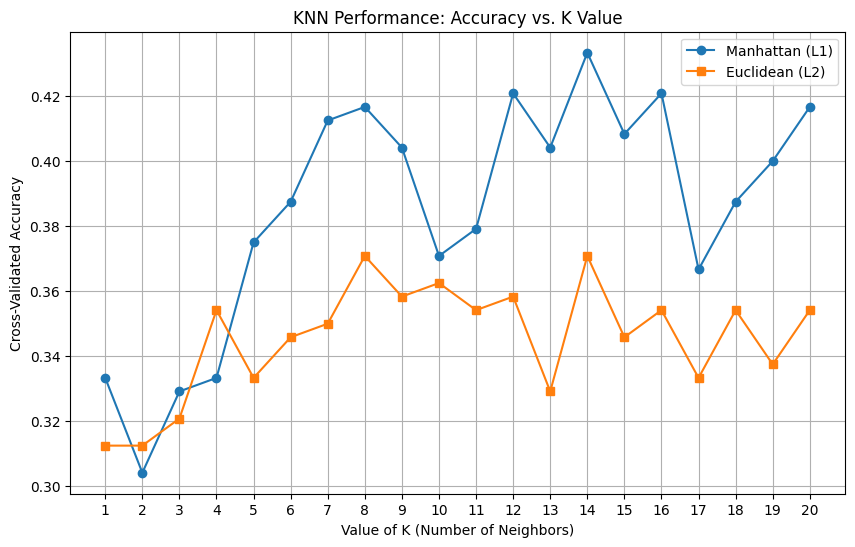

Best manhattan accuracy: 0.4333 at K=14
Best euclidean accuracy: 0.3708 at K=14


In [61]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# 1. Setup Data (Assuming X_train, y_train are defined from your previous steps)
# Ensure data is in numpy format to avoid indexing errors during splitting
X = x_train if isinstance(x_train, np.ndarray) else x_train.values
y = y_train if isinstance(y_train, np.ndarray) else y_train.values

# 2. Define Hyperparameters to search
k_values = range(1, 21)  # Checking K from 1 to 20
distance_metrics = ['manhattan', 'euclidean']

# 3. Initialize StratifiedKFold
# This ensures every evaluation uses the exact same data splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store mean accuracies for final analysis
results = {
    'manhattan': [],
    'euclidean': []
}

print(f"{'Metric':<12} | {'K':<3} | {'Mean Accuracy'}")
print("-" * 35)

# 4. Nested Loops: Metric -> K -> Cross-Validation
for metric in distance_metrics:
    for k in k_values:
        # Initialize model with current K and Metric
        model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        
        # --- The Cross-Validation Step ---
        # Instead of writing the manual loop every time, we can use cross_val_score
        # It uses the 'skf' we defined above to split the data 5 times
        cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
        
        # Calculate average accuracy across the 5 folds
        mean_accuracy = np.mean(cv_scores)
        
        # Store the result
        results[metric].append(mean_accuracy)
        
        # Print progress (Optional)
        print(f"{metric:<12} | {k:<3} | {mean_accuracy:.4f}")

# 5. Analysis & Visualization
# 
plt.figure(figsize=(10, 6))
plt.plot(k_values, results['manhattan'], label='Manhattan (L1)', marker='o')
plt.plot(k_values, results['euclidean'], label='Euclidean (L2)', marker='s')

plt.title('KNN Performance: Accuracy vs. K Value')
plt.xlabel('Value of K (Number of Neighbors)')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# 6. Find the Best Combination
for metric in distance_metrics:
    best_acc = max(results[metric])
    best_k = k_values[results[metric].index(best_acc)]
    print(f"Best {metric} accuracy: {best_acc:.4f} at K={best_k}")